In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./headbrain.csv')

In [3]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
data.rename(columns={"Brain Weight(grams)":"BrainWeight"},inplace=True)
data.head()

,Gender,Age Range,Head Size(cm^3),BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


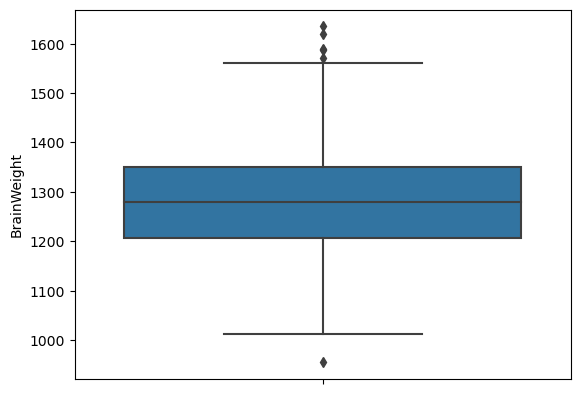

In [5]:
sns.boxplot(data=data, y='BrainWeight')
plt.show()

In [6]:
data['z_score'] =  stats.zscore(data.BrainWeight)

In [7]:
data.head()

,Gender,Age Range,Head Size(cm^3),BrainWeight,z_score
0,1,1,4512,1530,2.057908
1,1,1,3738,1297,0.117637
2,1,1,4261,1335,0.434076
3,1,1,3777,1282,-0.007273
4,1,1,4177,1590,2.557549


In [8]:
cleaned_data = data.query("z_score <2 & z_score >-2")
cleaned_data.head()

,Gender,Age Range,Head Size(cm^3),BrainWeight,z_score
1,1,1,3738,1297,0.117637
2,1,1,4261,1335,0.434076
3,1,1,3777,1282,-0.007273
5,1,1,3585,1300,0.142619
6,1,1,3785,1400,0.975353


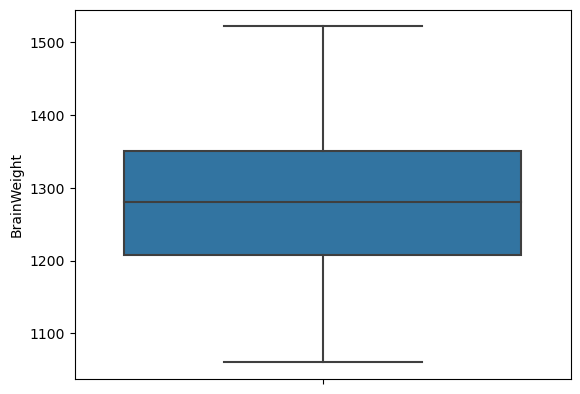

In [9]:
sns.boxplot(data=cleaned_data, y='BrainWeight')
plt.show()

In [10]:
lower = np.nanpercentile(data.BrainWeight, 5)
upper = np.nanpercentile(data.BrainWeight, 95)

In [11]:
cleaned_data = np.clip(data.BrainWeight, lower, upper)

In [12]:
cleaned_data

0      1505.2
1      1297.0
2      1335.0
3      1282.0
4      1505.2
        ...  
232    1110.0
233    1215.0
234    1104.0
235    1170.0
236    1120.0
Name: BrainWeight, Length: 237, dtype: float64

In [13]:
data1 = data[data['BrainWeight'] == cleaned_data]

In [14]:
data.shape

(237, 5)

In [15]:
data1.shape

(213, 5)

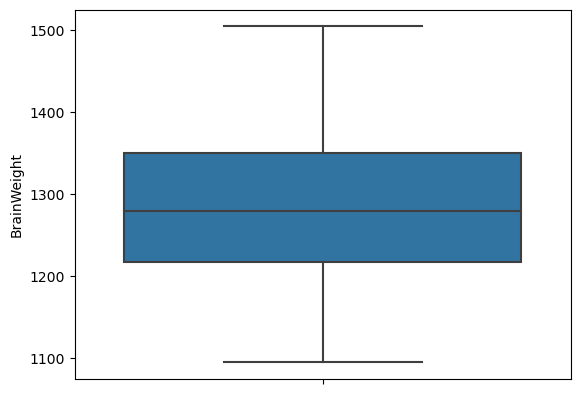

In [16]:
sns.boxplot(data=data1, y='BrainWeight')
plt.show()

In [17]:
import scipy.stats as stats

In [18]:
winsorized_brainweight = stats.mstats.winsorize(data.BrainWeight, limits=[0.05, 0.05])

In [19]:
winsorized_brainweight

masked_array(data=[1506, 1297, 1335, 1282, 1506, 1300, 1400, 1255, 1355,
                   1375, 1340, 1380, 1355, 1506, 1208, 1405, 1358, 1292,
                   1340, 1400, 1357, 1287, 1275, 1270, 1506, 1505, 1490,
                   1485, 1310, 1420, 1318, 1432, 1364, 1405, 1432, 1207,
                   1375, 1350, 1236, 1250, 1350, 1320, 1506, 1506, 1340,
                   1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390,
                   1400, 1225, 1310, 1506, 1330, 1222, 1415, 1175, 1330,
                   1485, 1470, 1135, 1310, 1154, 1506, 1415, 1468, 1390,
                   1380, 1432, 1240, 1195, 1225, 1188, 1252, 1315, 1245,
                   1430, 1279, 1245, 1309, 1412, 1120, 1220, 1280, 1440,
                   1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
                   1270, 1218, 1430, 1506, 1320, 1290, 1260, 1425, 1226,
                   1360, 1506, 1310, 1250, 1295, 1290, 1290, 1275, 1250,
                   1270, 1362, 1300, 1173, 1256, 14

In [20]:
data['winsorized_brainweight'] = winsorized_brainweight

In [21]:
data

,Gender,Age Range,Head Size(cm^3),BrainWeight,z_score,winsorized_brainweight
0,1,1,4512,1530,2.057908,1506
1,1,1,3738,1297,0.117637,1297
2,1,1,4261,1335,0.434076,1335
3,1,1,3777,1282,-0.007273,1282
4,1,1,4177,1590,2.557549,1506
...,...,...,...,...,...,...
232,2,2,3214,1110,-1.439577,1110
233,2,2,3394,1215,-0.565205,1215
234,2,2,3233,1104,-1.489541,1104
235,2,2,3352,1170,-0.939936,1170


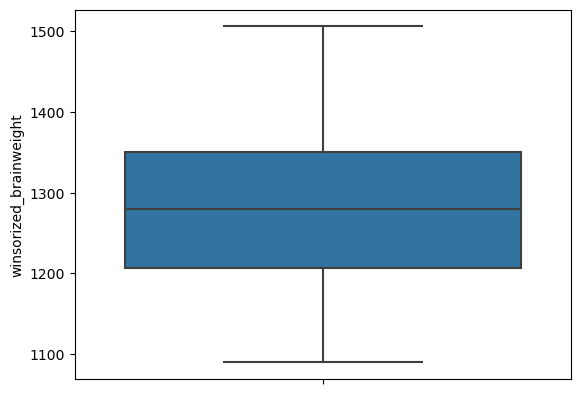

In [22]:
sns.boxplot(y = data.winsorized_brainweight)
plt.show()

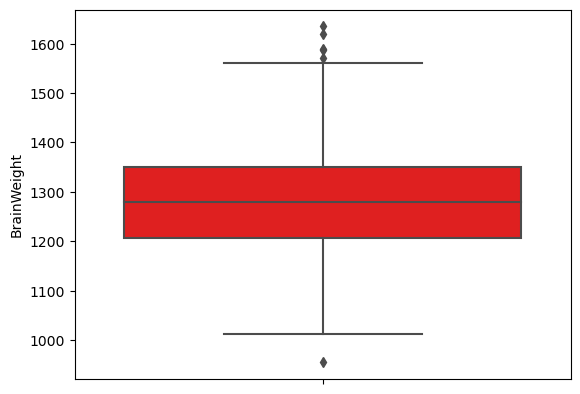

In [23]:
sns.boxplot(y = data.BrainWeight, color='red')
plt.show()